# Limpieza y Transformación de Datos Categóricos

* Tema: Limpieza y Transformación de los Datos (Data Wrangling)
* Unidad 02: Análisis Descriptivo de los Datos
* Materia: Programación para Analítica Descriptiva y Predictiva

**Objetivo**: En esta clase aprenderemos a limpiar y transformar datos categóricos para garantizar su calidad, coherencia y utilidad en análisis descriptivos y predictivos. Exploraremos cómo identificar y corregir valores inconsistentes,  reducir la cardinalidad y codificar variables categóricas para su uso en modelos de análisis y aprendizaje automático. Al finalizar, seremos capaces de preparar datos categóricos de manera eficiente, evitando errores y mejorando la precisión de nuestros análisis.

## Introducción

n el contexto de data wrangling para análisis descriptivo y predictivo, el proceso de corrección de datos categóricos se conoce generalmente como "limpieza y transformación de datos categóricos". Algunos de los subprocesos clave dentro de este enfoque incluyen:

1. Corrección de valores inconsistentes o errores tipográficos: 1) Normalización de valores: Convertir variaciones de un mismo concepto en una forma estándar (ejemplo: "M", "Male", "Masculino" → "Masculino").

2. Manejo de valores faltantes en datos categóricos.

3. Reducción de cardinalidad: Para variables categóricas con muchas clases, se pueden agrupar categorías de baja frecuencia en una nueva categoría como "Otros".
4. Codificación de variables categóricas
5. Detección de valores atípicos en datos categóricos


## Errores Tipográficos y Valores Inconsistentes

*Errores Tipográficos.*

Estos errores ocurren cuando hay fallas de escritura o digitación al ingresar los datos.

- "Bogta" → "Bogotá" (Error tipográfico: falta una "o").
- "cdmx" → "CDMX" (Mayúsculas/minúsculas inconsistentes).
- "Medelln" → "Medellín" (Falta tilde).
- "M" → "Masculino" (Abreviatura inconsistente).
- "fem" → "Femenino" (Forma incorrecta o abreviada).
- "M." → "Masculino" (Error de puntuación extra).

*Valores Inconsistentes*

Ocurren cuando los datos presentan variaciones semánticas que representan lo mismo pero de manera diferente.

-"Ing. Datos", "Ing Datos" → "Ingeniero de Datos" (Variaciones en abreviatura).
- "Data Engineer" → "Ingeniero de Datos" (Diferente idioma).
- "Ingeniero Datos" → "Ingeniero de Datos" (Falta la preposición "de").
- "media" y "Media" → Diferencia en capitalización.
- "ACT" → "Activo" (Abreviatura inconsistente).
- "activo" → "Activo" (Capitalización diferente).
- "Inactivo" y "INACTIVO" → Diferencia en mayúsculas/minúsculas.


### ¿Cómo detectar estos problemas?

Para dectar usamos una función de pandas llamada `unique()`, la cual obtiene los valores únicos de una columna (`df[columna].unique()`).

Para saber la frecuencia de cada valor único usamos `df[columna].value_counts()`

Veamos un ejemplo sencillo

In [ ]:
#Cargar la biblioteca
import pandas as pd

#Leemos el CSV cat_err01.csv
df = pd.read_csv('drive/MyDrive/Unidad02/cat_err01.csv',index_col=0)

print(df)

#Imprimimos los valores únicos
print(df['Ciudad'].unique())

#Imprimimos los valores únicos y el número de veces que aparecen
print(df['Ciudad'].value_counts())

# Si todas las columnas son categóricas
for col in df.columns:
    print(f"Valores únicos en {col}: {df[col].unique()}")

#Si todas las columnas son categóricas
#Mostrar la frecuencia de los valores únicos
for col in df.columns:
    print(f"Frecuencia de Valores únicos en {col}: {df[col].value_counts()}")

# Verificar valores únicos por columna categórica
for col in ['Género', 'Ciudad']:
    print(f"Valores únicos en {col}: {df[col].unique()}")

# Verificar frecuencia de valores únicos por columna categórica
for col in ['Género', 'Ciudad']:
    print(f"Valores únicos en {col}: {df[col].value_counts()}")



   ID Nombre   Ciudad     Género               Cargo Satisfacción
0   1   Juan     CDMX  Masculino  Ingeniero de Datos         Alta
1   2    Ana    Bogta   Femenino          Ing. Datos     Muy Alta
2   3  Pedro     cdmx          M       Data Engineer         ALTA
3   4  María  Medelln        fem           Ing Datos        media
4   5   Luis   Bogotá         M.     Ingeniero Datos        Media
5   6   José     CDMX  Masculino                 CEO         baja
['CDMX' 'Bogta' 'cdmx' 'Medelln' 'Bogotá']
Ciudad
CDMX       2
Bogta      1
cdmx       1
Medelln    1
Bogotá     1
Name: count, dtype: int64
Valores únicos en ID: [1 2 3 4 5 6]
Valores únicos en Nombre: ['Juan' 'Ana' 'Pedro' 'María' 'Luis' 'José']
Valores únicos en Ciudad: ['CDMX' 'Bogta' 'cdmx' 'Medelln' 'Bogotá']
Valores únicos en Género: ['Masculino' 'Femenino' 'M' 'fem' 'M.']
Valores únicos en Cargo: ['Ingeniero de Datos' 'Ing. Datos' 'Data Engineer' 'Ing Datos'
 'Ingeniero Datos' 'CEO']
Valores únicos en Satisfacción: ['Alta' '

### ¿Cómo corregir estos problemas?

Para corregir errores comunes como diferencias en capitalización y errores de escritura, usamos replace() y str.lower().

Veamos un ejemplo sin expresiones regulares

In [ ]:
#Leemos el CSV cat_err01.csv
df = pd.read_csv('drive/MyDrive/Unidad02/cat_err01.csv',index_col=0)

print(df)

#Imprimos la frecuencia antes de la correción
print(df['Género'].value_counts())

df['Género'] = df['Género'].replace({'M':'Masculino','fem':'Femenino','M.':'Masculino'})

#Imprimimos la frecuencia después de la correción
print(df['Género'].value_counts())

   ID Nombre   Ciudad     Género               Cargo Satisfacción
0   1   Juan     CDMX  Masculino  Ingeniero de Datos         Alta
1   2    Ana    Bogta   Femenino          Ing. Datos     Muy Alta
2   3  Pedro     cdmx          M       Data Engineer         ALTA
3   4  María  Medelln        fem           Ing Datos        media
4   5   Luis   Bogotá         M.     Ingeniero Datos        Media
5   6   José     CDMX  Masculino                 CEO         baja
Género
Masculino    2
Femenino     1
M            1
fem          1
M.           1
Name: count, dtype: int64
Género
Masculino    4
Femenino     2
Name: count, dtype: int64


In [ ]:
#Leemos el CSV cat_err01.csv
df = pd.read_csv('drive/MyDrive/Unidad02/cat_err01.csv',index_col=0)

print(df['Género'])

#Imprimos la frecuencia antes de la correción
print(df['Género'].value_counts())

#Si escribimos solo M sin \b, sustituirá dicha letra por Masculino,
#esto puede afectar a Mujer y escribir como Masculinoujer
#df['Género'] = df['Género'].replace({r'M\.?': 'Masculino'}, regex=True)

#usamos una expresión regular para corregir M o M.
#delimitar un caracter o palabra \b signfica que solo cambiará si aparece al principio
df['Género'] = df['Género'].replace({r'^\s*M\.?\s*$': 'Masculino'}, regex=True)

print("Después de la modificación")
print(df['Género'])
#Imprimos la frecuencia después de la correción
print(df['Género'].value_counts())


0    Masculino
1     Femenino
2            M
3          fem
4           M.
5    Masculino
Name: Género, dtype: object
Género
Masculino    2
Femenino     1
M            1
fem          1
M.           1
Name: count, dtype: int64
Después de la modificación
0    Masculino
1     Femenino
2    Masculino
3          fem
4    Masculino
5    Masculino
Name: Género, dtype: object
Género
Masculino    4
Femenino     1
fem          1
Name: count, dtype: int64


Combinar soluciones: str.lower() + replace()

En la columna Satisfacción los valores son inconsistentes. Podemos cambiar primero a mnúscula y luego corregir.

En el siguiente ejemplo al convertir primero a minúsculas se resuelven los problemas de ALTA y Media

In [ ]:
#Leemos el CSV cat_err01.csv
df = pd.read_csv('drive/MyDrive/Unidad02/cat_err01.csv',index_col=0)

print(df['Satisfacción'])

#Imprimos la frecuencia antes de la correción
print(df['Satisfacción'].value_counts())

df['Satisfacción'] = df['Satisfacción'].str.lower().replace({'muy alta': 'alta'})

#Imprimos la frecuencia antes de la correción
print(df['Satisfacción'].value_counts())


0        Alta
1    Muy Alta
2        ALTA
3       media
4       Media
5        baja
Name: Satisfacción, dtype: object
Satisfacción
Alta        1
Muy Alta    1
ALTA        1
media       1
Media       1
baja        1
Name: count, dtype: int64
Satisfacción
alta     3
media    2
baja     1
Name: count, dtype: int64


## **Ejercicio de Práctica**

Carga el archivo `cat_err02.csv` en un dataframe. Detecta y corrige los errores tipográficos y valores inconsistentes de las columnas Estado y Cargo.

In [ ]:
#Realiza la práctica con cat_err02.csv

## Baja Frecuencia en Categorías o Alta Cardinalidad

Las características categóricas de alta cardinalidad son aquellas que tienen una gran cantidad de valores únicos, como identificadores de productos, códigos postales o nombres. Estas características pueden plantear desafíos para la codificación de datos, ya que pueden crear una gran cantidad de variables ficticias, aumentar el uso de memoria y reducir el rendimiento del modelo. Por lo tanto, a menudo es necesario reducir la cardinalidad de estas características, agrupándolas en menos categorías, en función de algún criterio o lógica.

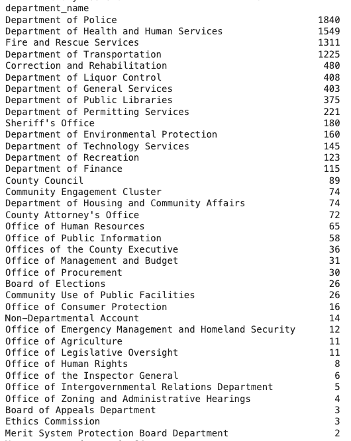


Carga el conjunto de datos `employee_salaries.csv`e imprime la frecuencia de los valores únicos de la columna `deparment_name`.


Problemas de la Alta Cardinalidad:Efectos negativos de muchas categorías en modelos de datos:

* Aumento del número de variables cuando se usa One-Hot Encoding.
* Pérdida de eficiencia en cálculos y almacenamiento.
* Problemas de sobreajuste si los modelos aprenden patrones irrelevantes.
* Dificultad en la interpretación cuando hay demasiadas categorías poco representadas.

In [ ]:
#Carga el conjunto de datos employee_salaries.csv


#imprime la frecuencia de los valores únicos

### Identificar la Alta Cardinalidad

Para determinar si una variable categórica tiene alta cardinalidad, podemos analizar cuántos valores únicos contiene en comparación con el número total de registros.

Métodos para identificarla:
* Cálculo del número de categorías únicas:
"Si una columna tiene casi tantos valores únicos como filas en el dataset, es probable que tenga alta cardinalidad.

Para ello usaremos `df.shape` y `nunique()`, donde este último método se usa para contar el número de valores únicos en una columna o en todo un DataFrame.

* Frecuencia de categorías:
"Podemos revisar si algunas categorías aparecen muy pocas veces, lo que indica que la variable podría necesitar agrupación o transformación."

* Análisis de proporción:
"Si más del 90% de los valores únicos aparecen en menos del 1% de los datos, hay una distribución altamente desbalanceada que puede afectar el modelo."

In [ ]:
import pandas as pd

# Crear un DataFrame con una columna de alta cardinalidad
df = pd.DataFrame({
    'ID_Cliente': [f'Cliente_{i}' for i in range(1, 101)],  # 100 valores únicos
    'Compras': [i * 10 for i in range(1, 101)]
})

# Contar valores únicos en la columna 'ID_Cliente'
num_unicos = df['ID_Cliente'].nunique()
total_filas = len(df)

# Determinar si hay alta cardinalidad
print(f"Valores únicos en 'ID_Cliente': {num_unicos}")
print(f"Total de filas en el dataset: {total_filas}")
print(f"Porcentaje de valores únicos: {num_unicos / total_filas:.2%}")

if num_unicos / total_filas > 0.5:  # Umbral del 50%
    print("⚠️ La columna 'ID_Cliente' tiene alta cardinalidad.")
else:
    print("✅ La columna 'ID_Cliente' tiene cardinalidad manejable.")


Valores únicos en 'ID_Cliente': 100
Total de filas en el dataset: 100
Porcentaje de valores únicos: 100.00%
⚠️ La columna 'ID_Cliente' tiene alta cardinalidad.


Vamos a trabajar con el conjunto de datos cat_err03.csv.

Agrupar categorías poco frecuentes en "Otros"

In [ ]:
import pandas as pd

# Carga el conjunto de datos cat_err03.csv
df = pd.read_csv('drive/MyDrive/Unidad02/cat_err03.csv', index_col=0)

print(df.head())

print(df['Producto'].value_counts())

umbral = 2
conteo_productos = df['Producto'].value_counts()
categorias_poco_frecuentes = conteo_productos[conteo_productos < umbral].index
df['Producto_Agrupado'] = df['Producto'].replace(categorias_poco_frecuentes, 'Otros')

print(df['Producto_Agrupado'].value_counts())


     Producto
0      Laptop
1     Celular
2      Tablet
3  Smartwatch
4      Laptop
Producto
Celular        3
Cámara         3
Laptop         2
Tablet         2
Smartwatch     1
Teclado        1
Mouse          1
Monitor        1
Impresora      1
Router         1
Auriculares    1
Proyector      1
Name: count, dtype: int64
Producto_Agrupado
Otros      8
Celular    3
Cámara     3
Laptop     2
Tablet     2
Name: count, dtype: int64


In [ ]:
df['Categoría'] = df['Producto'].replace({
    'Laptop': 'Computación', 'Celular': 'Telefonía', 'Tablet': 'Computación',
    'Smartwatch': 'Accesorios', 'Teclado': 'Periféricos', 'Mouse': 'Periféricos',
    'Monitor': 'Periféricos', 'Impresora': 'Periféricos', 'Router': 'Redes',
    'Auriculares': 'Accesorios', 'Cámara': 'Fotografía', 'Proyector': 'Oficina'
})

print(df['Categoría'].value_counts())

Categoría
Computación    4
Periféricos    4
Telefonía      3
Fotografía     3
Accesorios     2
Redes          1
Oficina        1
Name: count, dtype: int64


In [ ]:
frecuencia = df['Producto'].value_counts()
df['Producto_Frecuencia'] = df['Producto'].map(frecuencia)

print(df['Producto_Frecuencia'].value_counts())

Producto_Frecuencia
1    8
3    6
2    4
Name: count, dtype: int64


## Tipo de Datos Incorrecto



In [ ]:
#Leemos el CSV cat_err01.
import pandas as pd
df = pd.read_csv('drive/MyDrive/Unidad02/cat_err01.csv',index_col=0)

#print(df)

#Imprimos la frecuencia antes de la correción
#print(df['Género'].value_counts())

df['Ciudad'] = df['Ciudad'].replace({'Bogta':'Bogotá','cdmx':'CDMX','Medelln':'Medellín'})

df['Género'] = df['Género'].replace({'M':'Masculino','fem':'Femenino','M.':'Masculino'})

#Imprimimos la frecuencia después de la correción
print(df['Género'].value_counts())

#Imprimimos la frecuencia después de la correción
print(df['Ciudad'].value_counts())

#Para todas las columnas
print("Tipo de Datos")
print(df.dtypes)
#cantidad de bytes
#print(df.memory_usage(deep=True))
#print(f"Memoria total en bytes: {df.memory_usage(deep=True).sum()}")
#print(df.shape)

#Para determinadas columnas
print("Cantidad de memoria para las columnas: Ciudad y Género")
print(df[['Ciudad','Género']].memory_usage(deep=True))
print(f"Memoria total en bytes: {df[['Ciudad','Género']].memory_usage(deep=True).sum()}")


df["Ciudad"] = df["Ciudad"].astype("category")
df["Género"] = df["Género"].astype("category")

print("Tipo de Datos")
print(df.dtypes)

print("Cantidad de memoria para las columnas: Ciudad y Género")
print(df[['Ciudad','Género']].memory_usage(deep=True))
print(f"Memoria total en bytes: {df[['Ciudad','Género']].memory_usage(deep=True).sum()}")



Género
Masculino    4
Femenino     2
Name: count, dtype: int64
Ciudad
CDMX        3
Bogotá      2
Medellín    1
Name: count, dtype: int64
Tipo de Datos
Nombre          object
Ciudad          object
Género          object
Cargo           object
Satisfacción    object
dtype: object
Cantidad de memoria para las columnas: Ciudad y Género
Index      48
Ciudad    446
Género    394
dtype: int64
Memoria total en bytes: 888
Tipo de Datos
Nombre            object
Ciudad          category
Género          category
Cargo             object
Satisfacción      object
dtype: object
Cantidad de memoria para las columnas: Ciudad y Género
Index      48
Ciudad    369
Género    245
dtype: int64
Memoria total en bytes: 662
